### 1.Lister les données disponibles

In [32]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import pandas as pd

# Définir le chemin du dossier contenant les sous-dossiers avec les images
raw_img_dir = r'raw-img'

# Liste pour stocker les informations sur les fichiers
data = {'Filename': [], 'Label': []}

# Parcourir chaque sous-dossier
for label_folder in os.listdir(raw_img_dir):
    label_folder_path = os.path.join(raw_img_dir, label_folder)
    if os.path.isdir(label_folder_path):
        # Parcourir chaque fichier dans le sous-dossier
        for file_name in os.listdir(label_folder_path):
            # Ajouter le nom de fichier et le label à la liste
            data['Filename'].append(os.path.join(label_folder_path, file_name))
            data['Label'].append(label_folder)

In [38]:
# Créer un DataFrame à partir des données
df = pd.DataFrame(data)

# Afficher les premières lignes du DataFrame
print(df.head(10))

                                           Filename Label
0      raw-img\cane\OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg  cane
1  raw-img\cane\OIP---A27bIBcUgX1qkbpZOPswHaFS.jpeg  cane
2  raw-img\cane\OIP---cByAiEbIxIAleGo9AqOQAAAA.jpeg  cane
3  raw-img\cane\OIP---ZIdwfUcJeVxnh47zppcQHaFj.jpeg  cane
4  raw-img\cane\OIP---ZRsOF7zsMqhW30WeF8-AHaFj.jpeg  cane
5  raw-img\cane\OIP---_cJbI6Ei26w5bW1urHewHaCf.jpeg  cane
6  raw-img\cane\OIP--0C2kq6I68beB3DduLoxMgHaEf.jpeg  cane
7  raw-img\cane\OIP--0CZnfLuBERVtzRm2QbB3gHaK4.jpeg  cane
8  raw-img\cane\OIP--1QXriWyOTJg-9fEwbznmgHaI4.jpeg  cane
9  raw-img\cane\OIP--2uTtzjaszBfEMCROuLN3wHaLH.jpeg  cane


In [43]:
df.isnull().sum()

Filename    0
Label       0
dtype: int64

### 2.Analyse exploratoire des données 

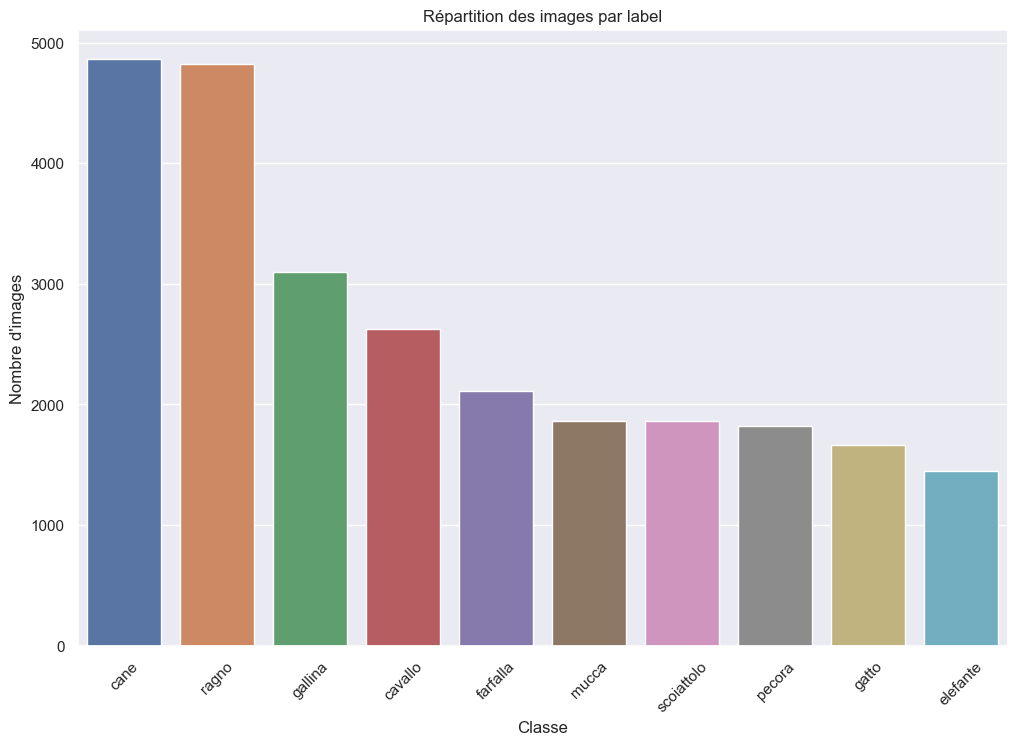

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Label', data=df, order=df['Label'].value_counts().index)
plt.title('Répartition des images par label')
plt.xlabel('Classe')
plt.ylabel('Nombre d\'images')
plt.xticks(rotation=45)
plt.show()

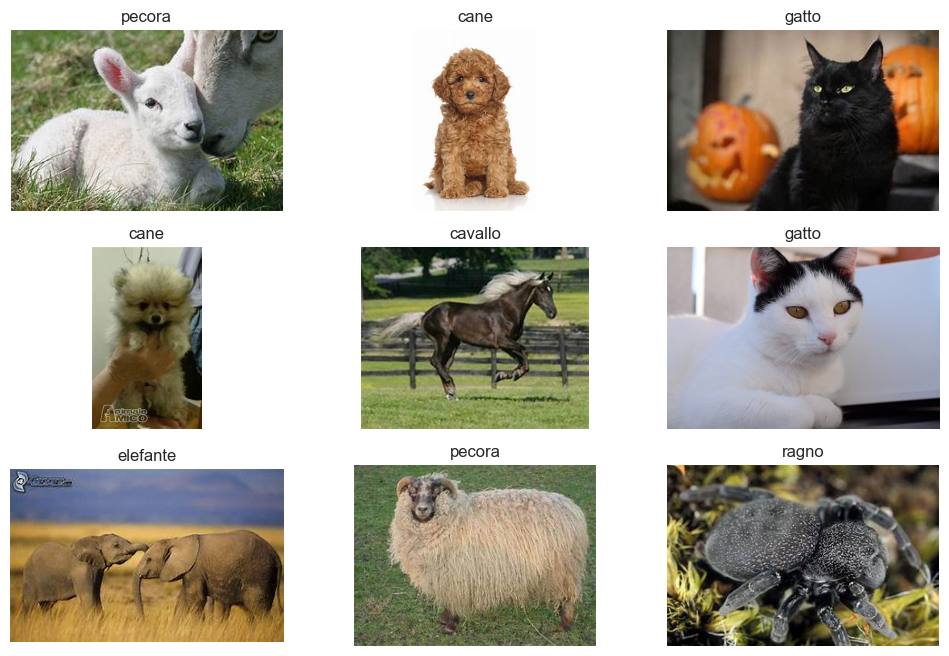

In [42]:
import random
from PIL import Image

# Afficher quelques images aléatoires avec leurs labels
plt.figure(figsize=(12, 8))
for i in range(9):
    random_index = random.randint(0, len(df) - 1)
    image_path = df.iloc[random_index]['Filename']
    label = df.iloc[random_index]['Label']
    image = Image.open(image_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')
plt.show()


In [44]:
import pandas as pd

# Supposons que votre DataFrame s'appelle df
df.to_csv('donnees_animaux.csv', index=False)
